<a href="https://colab.research.google.com/github/VennelaMandava/VennelaMandava/blob/main/Quarter_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 1.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from pygam import LogisticGAM, s

X, y = fetch_openml("diabetes", version=1, as_frame=False, return_X_y=True)
y = (y == "tested_positive").astype(int)  # 0/1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

p = X_train.shape[1]
terms = s(0, n_splines=5)
for i in range(1, p):
    terms += s(i, n_splines=5)

gam = LogisticGAM(terms, lam=10.0, max_iter=200).fit(X_train, y_train)
y_pred = gam.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.734375
Precision: 0.6481481481481481
Recall: 0.5223880597014925
Confusion Matrix:
 [[106  19]
 [ 32  35]]


In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pygam import LinearGAM, s

# -----------------------
# Load continuous regression dataset
# -----------------------
data = load_diabetes()
X, y = data.data, data.target  # y is continuous

# -----------------------
# Train/test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------
# Scale features (recommended for GAM)
# -----------------------
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# -----------------------
# Build GAM terms: one smooth per feature
# -----------------------
p = X_train_s.shape[1]
terms = s(0, n_splines=10)
for i in range(1, p):
    terms += s(i, n_splines=10)

# -----------------------
# Fit GAM (regression)
# -----------------------
gam = LinearGAM(terms, lam=10.0, max_iter=500).fit(X_train_s, y_train)
y_pred_gam = gam.predict(X_test_s)

# Metrics for GAM
r2_gam = r2_score(y_test, y_pred_gam)
mse_gam = mean_squared_error(y_test, y_pred_gam)
rmse_gam = np.sqrt(mse_gam)

print("GAM (LinearGAM)")
print("R^2:", r2_gam)
print("MSE:", mse_gam)
print("RMSE:", rmse_gam)

# -----------------------
# Fit Decision Tree Regressor
# (Scaling not needed, but we keep raw X for tree)
# -----------------------
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Metrics for Tree
r2_tree = r2_score(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("\nDecision Tree Regressor")
print("R^2:", r2_tree)
print("MSE:", mse_tree)
print("RMSE:", rmse_tree)

GAM (LinearGAM)
R^2: 0.4983436167190033
MSE: 2774.004184683356
RMSE: 52.66881605545502

Decision Tree Regressor
R^2: -0.07450922562649187
MSE: 5941.7027027027025
RMSE: 77.08244094930247


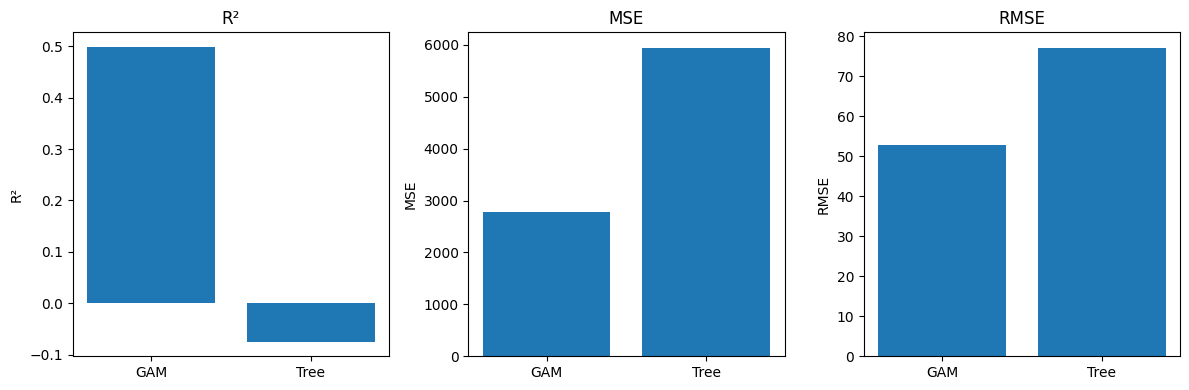

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# ---- R^2 ----
axes[0].bar(["GAM", "Tree"], [r2_gam, r2_tree])
axes[0].set_title("R²")
axes[0].set_ylabel("R²")

# ---- MSE ----
axes[1].bar(["GAM", "Tree"], [mse_gam, mse_tree])
axes[1].set_title("MSE")
axes[1].set_ylabel("MSE")

# ---- RMSE ----
axes[2].bar(["GAM", "Tree"], [rmse_gam, rmse_tree])
axes[2].set_title("RMSE")
axes[2].set_ylabel("RMSE")

plt.tight_layout()
plt.show()


Baseline GAM
R^2:  0.498344
MSE:  2774.004185
RMSE: 52.668816

Baseline Decision Tree
R^2:  0.356508
MSE:  3558.311802
RMSE: 59.651587

Gradient-Boosted Decision Tree (final)
R^2:  0.441785
MSE:  3086.754017
RMSE: 55.558564

Friedman/Newton Boosted GAM (final)
R^2:  0.485402
MSE:  2845.566836
RMSE: 53.343855


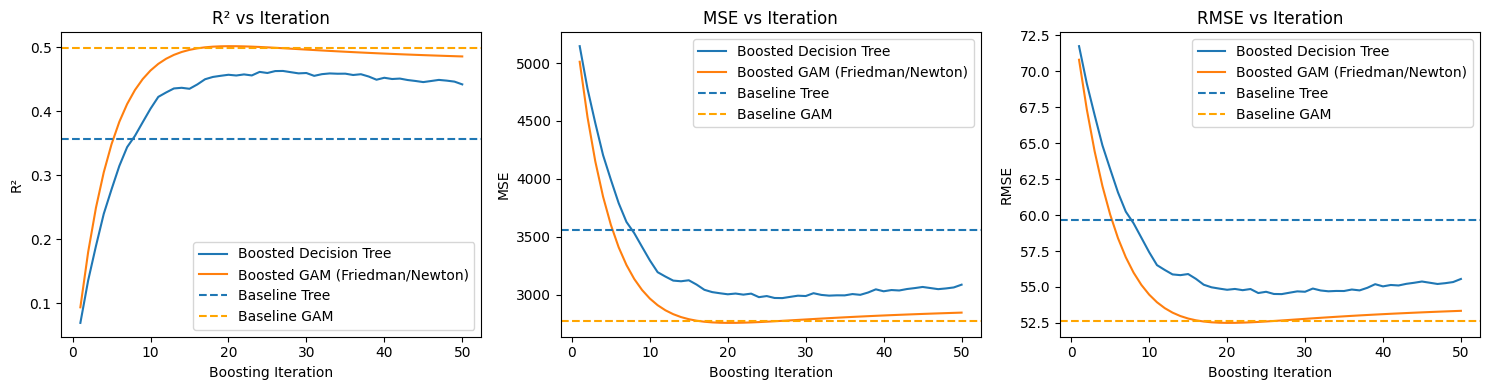

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from pygam import LinearGAM, s


# ----------------------------
# Helpers
# ----------------------------
def build_terms(p, n_splines=10):
    terms = s(0, n_splines=n_splines)
    for i in range(1, p):
        terms += s(i, n_splines=n_splines)
    return terms

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def report_regression(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r = np.sqrt(mse)
    print(f"\n{name}")
    print(f"R^2:  {r2:.6f}")
    print(f"MSE:  {mse:.6f}")
    print(f"RMSE: {r:.6f}")
    return r2, mse, r


# ----------------------------
# Friedman/Newton Boosted GAM for regression (2nd-order boosting)
# (For squared loss, Newton step reduces to fitting residuals; we keep this
# as the "Friedman/Newton" boosted GAM version you requested.)
# ----------------------------
def fit_predict_boosted_gam_friedman_regression(
    X_train, y_train, X_test, y_test,
    n_estimators=50,
    learning_rate=0.1,
    n_splines=10,
    lam=10.0
):
    p = X_train.shape[1]
    terms = build_terms(p, n_splines=n_splines)

    # Initialize with constant prediction (mean)
    F_train = np.full_like(y_train, y_train.mean(), dtype=float)
    F_test = np.full(X_test.shape[0], y_train.mean(), dtype=float)

    r2_hist, mse_hist, rmse_hist = [], [], []

    models = []
    for _ in range(n_estimators):
        # Squared loss: negative gradient is residual (y - F)
        r = y_train - F_train

        base = LinearGAM(terms, lam=lam).fit(X_train, r)
        models.append(base)

        F_train += learning_rate * base.predict(X_train)
        F_test += learning_rate * base.predict(X_test)

        # Track metrics on test set after each iteration
        r2_hist.append(r2_score(y_test, F_test))
        mse = mean_squared_error(y_test, F_test)
        mse_hist.append(mse)
        rmse_hist.append(np.sqrt(mse))

    return F_test, r2_hist, mse_hist, rmse_hist, models


# ----------------------------
# Main: dataset + models + plots
# ----------------------------
if __name__ == "__main__":
    # Continuous features + continuous target
    data = load_diabetes()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42
    )

    # Scale for GAM (trees don't need it; we keep raw X for tree models)
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)

    # ----------------------------
    # Baseline models (for horizontal reference lines)
    # ----------------------------
    # Baseline GAM (single LinearGAM)
    p = X_train_s.shape[1]
    terms = build_terms(p, n_splines=10)
    base_gam = LinearGAM(terms, lam=10.0).fit(X_train_s, y_train)
    y_pred_base_gam = base_gam.predict(X_test_s)
    base_gam_r2, base_gam_mse, base_gam_rmse = report_regression("Baseline GAM", y_test, y_pred_base_gam)

    # Baseline Tree (single DecisionTreeRegressor)
    base_tree = DecisionTreeRegressor(random_state=42, max_depth=4)
    base_tree.fit(X_train, y_train)
    y_pred_base_tree = base_tree.predict(X_test)
    base_tree_r2, base_tree_mse, base_tree_rmse = report_regression("Baseline Decision Tree", y_test, y_pred_base_tree)

    # ----------------------------
    # Gradient-Boosted Decision Tree (GBDT) with per-iteration tracking
    # ----------------------------
    gbdt = GradientBoostingRegressor(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )
    gbdt.fit(X_train, y_train)

    gbdt_r2_hist, gbdt_mse_hist, gbdt_rmse_hist = [], [], []
    for y_pred_stage in gbdt.staged_predict(X_test):
        gbdt_r2_hist.append(r2_score(y_test, y_pred_stage))
        mse = mean_squared_error(y_test, y_pred_stage)
        gbdt_mse_hist.append(mse)
        gbdt_rmse_hist.append(np.sqrt(mse))

    # Final GBDT metrics
    y_pred_gbdt_final = gbdt.predict(X_test)
    report_regression("Gradient-Boosted Decision Tree (final)", y_test, y_pred_gbdt_final)

    # ----------------------------
    # Friedman/Newton Gradient-Boosted GAM (per-iteration tracking)
    # ----------------------------
    y_pred_bg_gam_final, gam_r2_hist, gam_mse_hist, gam_rmse_hist, _ = fit_predict_boosted_gam_friedman_regression(
        X_train_s, y_train, X_test_s, y_test,
        n_estimators=50,
        learning_rate=0.1,
        n_splines=10,
        lam=10.0
    )

    # Final boosted GAM metrics
    report_regression("Friedman/Newton Boosted GAM (final)", y_test, y_pred_bg_gam_final)

    # ----------------------------
    # Side-by-side line graphs:
    # - each plot shows boosted progression per iteration (Tree vs GAM)
    # - and horizontal baselines (Baseline Tree + Baseline GAM)
    # ----------------------------
    iters = np.arange(1, len(gbdt_r2_hist) + 1)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # R^2
    axes[0].plot(iters, gbdt_r2_hist, label="Boosted Decision Tree")
    axes[0].plot(iters, gam_r2_hist, label="Boosted GAM (Friedman/Newton)")
    axes[0].axhline(base_tree_r2, linestyle="--", label="Baseline Tree")
    axes[0].axhline(base_gam_r2, linestyle="--", color = 'orange', label="Baseline GAM")
    axes[0].set_title("R² vs Iteration")
    axes[0].set_xlabel("Boosting Iteration")
    axes[0].set_ylabel("R²")

    # MSE
    axes[1].plot(iters, gbdt_mse_hist, label="Boosted Decision Tree")
    axes[1].plot(iters, gam_mse_hist, label="Boosted GAM (Friedman/Newton)")
    axes[1].axhline(base_tree_mse, linestyle="--", label="Baseline Tree")
    axes[1].axhline(base_gam_mse, linestyle="--", color = 'orange', label="Baseline GAM")
    axes[1].set_title("MSE vs Iteration")
    axes[1].set_xlabel("Boosting Iteration")
    axes[1].set_ylabel("MSE")

    # RMSE
    axes[2].plot(iters, gbdt_rmse_hist, label="Boosted Decision Tree")
    axes[2].plot(iters, gam_rmse_hist, label="Boosted GAM (Friedman/Newton)")
    axes[2].axhline(base_tree_rmse, linestyle="--", label="Baseline Tree")
    axes[2].axhline(base_gam_rmse, linestyle="--", color = 'orange', label="Baseline GAM")
    axes[2].set_title("RMSE vs Iteration")
    axes[2].set_xlabel("Boosting Iteration")
    axes[2].set_ylabel("RMSE")

    for ax in axes:
        ax.legend()

    plt.tight_layout()
    plt.show()